# Logistic Regression on Statlog (Heart) Data Set

[Source](http://www-bcf.usc.edu/~gareth/ISL/Heart.csv)

see [UCI Machine Learning Repository: Statlog (Heart) Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 

See also 
- [Warm Up: Machine Learning with a Heart](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/) 
- [Machine Learning With A Heart - Benchmark](http://drivendata.co/blog/machine-learning-with-a-heart-benchmark/)

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

import seaborn as sns
sns.set()

## 1. Pre-Processing the Data

In [2]:
include = list(range(1,15))
include

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [3]:
data = pd.read_csv("data/heart.csv", usecols=include, sep =",")

In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [6]:
missing_values = data[data.isnull().any(axis=1)]
missing_values

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
87,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
166,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
192,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
266,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes
287,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No
302,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [7]:
data = data.dropna(axis=0, how='any').reset_index(drop=True)

In [8]:
data.shape

(297, 14)

In [9]:
numerical = ["Age", "RestBP", "Chol", "Fbs", "RestECG", "MaxHR", "ExAng", "Oldpeak", "Slope", "Ca"]
categorical = ["Sex", "ChestPain", "Thal", "AHD"]

### target: AHD

In [13]:
data["AHD"].head()

0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object

In [14]:
data["AHD"] = 1.0 * (data["AHD"] == 'Yes')

""" ---------------------------------------------------------------------------
alternatively, to replace with boolean values: 
data.replace({v: {'Yes': True, 'No': False} for v in data.select_dtypes([object])}) 
---------------------------------------------------------------------------"""

" ---------------------------------------------------------------------------\nalternatively, to replace with boolean values: \ndata.replace({v: {'Yes': True, 'No': False} for v in data.select_dtypes([object])}) \n---------------------------------------------------------------------------"

In [15]:
data["AHD"].head()

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: AHD, dtype: float64

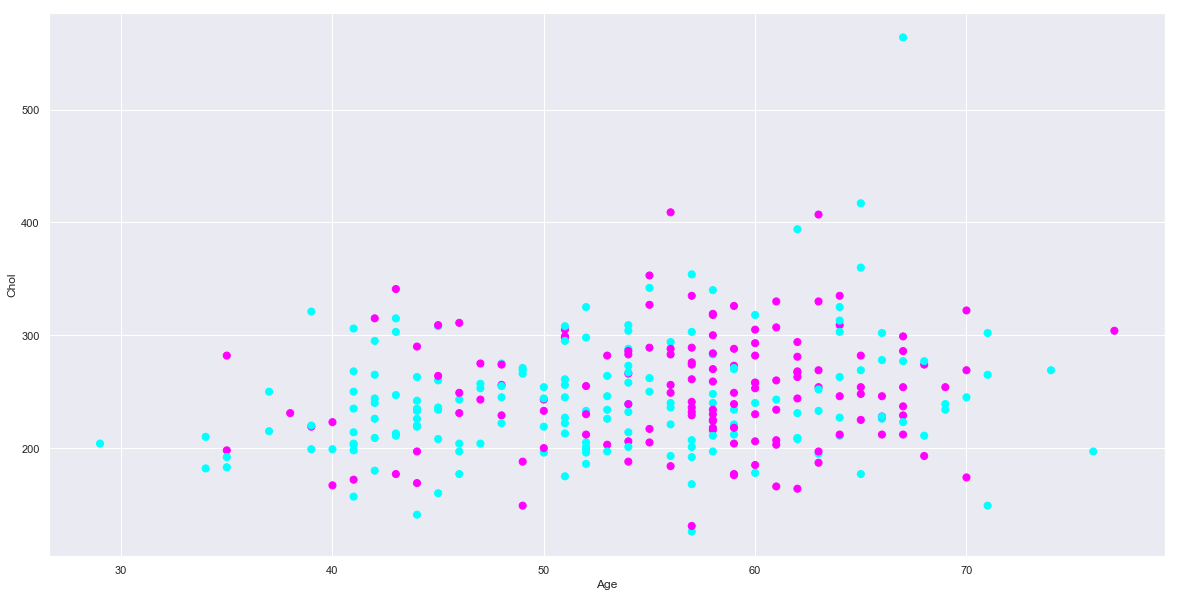

In [18]:
fig = plt.figure(figsize=(20,10))
plt.xlabel('Age')
plt.ylabel('Chol')
plt.scatter(x=data['Age'], y=data['Chol'], c=data['AHD'], s=50, cmap='cool');

--- 

### re-encode feature: ChestPain

In [ ]:
data['ChestPain'].value_counts()

In [ ]:
ChestPain_cat = data['ChestPain']
ChestPain_encoded, ChestPain_categories = ChestPain_cat.factorize()

In [ ]:
ChestPain_encoded

In [ ]:
ChestPain_categories

In [ ]:
encoder = OneHotEncoder()
ChestPain_cat_1hot = encoder.fit_transform(ChestPain_encoded.reshape(-1,1))

In [ ]:
ChestPain_cat_1hot = pd.DataFrame(ChestPain_cat_1hot.toarray())

In [ ]:
ChestPain_cat_1hot.head()

In [ ]:
ChestPain_cat_1hot = ChestPain_cat_1hot.rename(columns=\
                            {0: 'typical', 1: 'asymptomatic', 2:'nonanginal', 3:'nontypical'})

In [ ]:
ChestPain_cat_1hot.head()

In [ ]:
ChestPain_cat_1hot.sum()

---

### re-encode feature: Thal

In [ ]:
data['Thal'].value_counts()

In [ ]:
Thal_cat = data['Thal']
Thal_encoded, Thal_categories = Thal_cat.factorize()

In [ ]:
Thal_encoded

In [ ]:
Thal_categories

In [ ]:
encoder = OneHotEncoder()
Thal_cat_1hot = encoder.fit_transform(Thal_encoded.reshape(-1,1))

In [ ]:
Thal_cat_1hot = pd.DataFrame(Thal_cat_1hot.toarray())

In [ ]:
Thal_cat_1hot.head()

In [ ]:
Thal_cat_1hot = Thal_cat_1hot.rename(columns=\
                            {0: 'normal', 1: 'reversable', 2:'fixed'})

In [ ]:
Thal_cat_1hot.head()

In [ ]:
Thal_cat_1hot.sum()

--- 

    To Do: write function to facilitate binary re-encoding of categorical variables

--- 

In [ ]:
data_X = pd.concat([data[numerical], data["Sex"], ChestPain_cat_1hot, Thal_cat_1hot], axis=1)

In [ ]:
data_X.shape

In [ ]:
data_y = data["AHD"]

In [ ]:
data = pd.concat([data_X, data_y], axis=1)
corr_matrix = data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 14}, linewidths=1, cmap='viridis');

--- 

## 2. Splitting Data into Training and Test Sets 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=11)

## 3.1 Scikit LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(X_train, y_train)

In [ ]:
# Make predictions on entire test data
y_prediction = logisticRegr.predict(X_test)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_prediction))
print("RMSE:", np.sqrt(((y_test - y_prediction) ** 2).mean()))
print("R²:", r2_score(y_test, y_prediction))
print("RMSE % of mean:", np.sqrt(((y_test - y_prediction) ** 2).mean()) / y_test.mean())
print("Calibration:", y_prediction.mean() / y_test.mean())

:warning: **Caveat!** Results vary wildly depending on ```random_state```.

## 3.2 Scikit SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
classifier = SGDClassifier(n_jobs=1, loss="log", max_iter = 10)

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on entire test data
y_prediction = classifier.predict(X_test)

In [ ]:
# y_test = np.array(y_test)

In [ ]:
type(y_prediction)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_prediction))
print("RMSE:", np.sqrt(((y_test - y_prediction) ** 2).mean()))
print("R²:", r2_score(y_test, y_prediction))
print("RMSE % of mean:", np.sqrt(((y_test - y_prediction) ** 2).mean()) / y_test.mean())
print("Calibration:", y_prediction.mean() / y_test.mean())

### 4. Confusion Matrix 

In [ ]:
cm = metrics.confusion_matrix(y_test, y_prediction)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='viridis');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
""" --------------------------------------------------------------------
xticks_val = [0.5, 1.5] 
xticks_lab = ['Negative', 'Positive'] 
yticks_val = [0.5, 1.5] 
yticks_lab = ['False', 'True'] 
plt.xticks(xticks_val, xticks_lab)
plt.yticks(yticks_val, yticks_lab)
-------------------------------------------------------------------- """
plot_title = 'Accuracy Score: {0}'.format(r2_score(y_test, y_prediction))
plt.title(plot_title, size = 15);
plt.show();

--- 